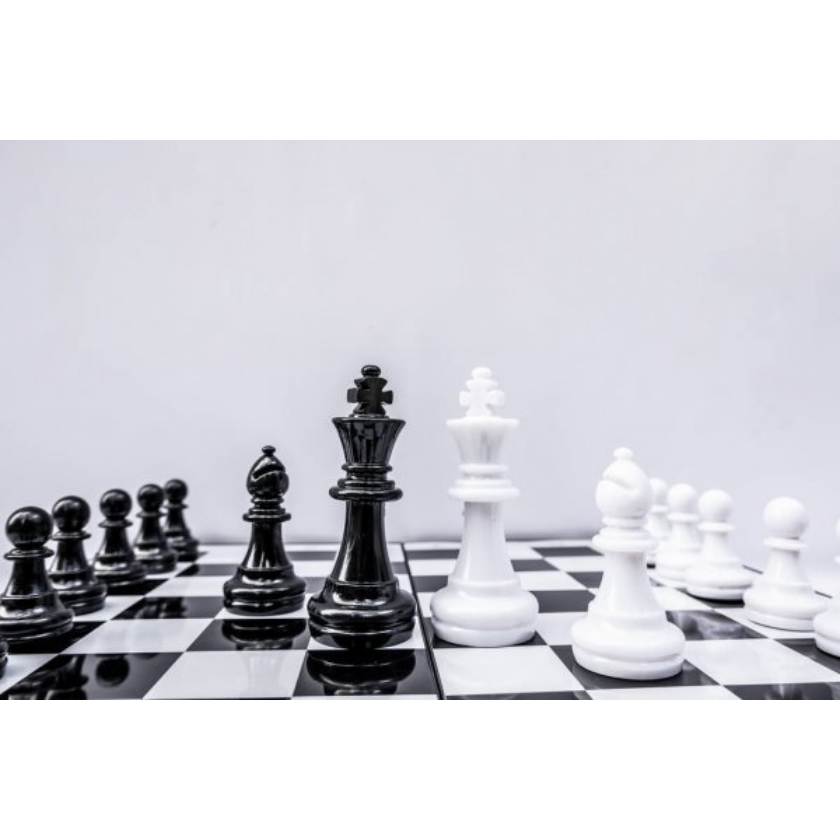

In [1]:
library(EBImage)
img = readImage("https://st3.depositphotos.com/25985398/i/600/depositphotos_323451788-stock-photo-the-chess-board-shows-leadership.jpg")
display(img, method = "raster")

# **Lets try to predict who win's **

In [2]:
library(tidyverse)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.4     ✔ dplyr   1.0.7
✔ tidyr   1.1.3     ✔ stringr 1.4.0
✔ readr   2.0.1     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::combine()   masks EBImage::combine()
✖ dplyr::filter()    masks stats::filter()
✖ dplyr::lag()       masks stats::lag()
✖ purrr::transpose() masks EBImage::transpose()



In [3]:
Df <- read.csv(file = '../input/online-chess-games/chess_games.csv')
print("The number of rows/ character in Df is:")
nrow(Df)
# taking the raated game here
Rated_Df<- Df%>%
group_by(rated)%>%
filter(str_detect(rated,"TRUE"))

print("The number of rows/ character in Rated_Df is:")
nrow(Rated_Df)



[1] "The number of rows/ character in Df is:"


[1] 20058

[1] "The number of rows/ character in Rated_Df is:"


[1] 16155

In [4]:
Rated_Df$game_id <- NULL
Rated_Df$rated <- NULL
Rated_Df$moves <- NULL
Rated_Df$opening_fullname <- NULL
Rated_Df$opening_shortname <- NULL
Rated_Df$opening_response <- NULL
Rated_Df$opening_variation<- NULL
Rated_Df$white_id<- NULL
Rated_Df$black_id<- NULL
Rated_Df$time_increment<- NULL
Rated_Df$opening_code<- NULL

Rated_Df$winner[Rated_Df$winner == "White"] <- 1
Rated_Df$winner[Rated_Df$winner == "Draw"] <- 0
Rated_Df$winner[Rated_Df$winner == "Black"] <- -1
Rated_Df$victory_status[Rated_Df$victory_status == "Draw"] <- 0
Rated_Df$victory_status[Rated_Df$victory_status == "Mate"] <- 1
Rated_Df$victory_status[Rated_Df$victory_status == "Resign"] <- -1
Rated_Df$victory_status[Rated_Df$victory_status == "Out of Time"] <- 2

Rated_Df$victory_status <- as.numeric(Rated_Df$victory_status)
Rated_Df$white_rating <- as.numeric(Rated_Df$white_rating)
Rated_Df$turns <- as.numeric(Rated_Df$turns)
Rated_Df$black_rating<- as.numeric(Rated_Df$black_rating)
Rated_Df$opening_moves<- as.numeric(Rated_Df$opening_moves)

Rated_Df$winner <- as.numeric(Rated_Df$winner)
Rated_Df<- Rated_Df %>%
relocate(winner, .after = opening_moves)


In [5]:
library(caTools)
set.seed(123)
split = sample.split(Rated_Df$winner, SplitRatio = 0.75)
training_set = subset(Rated_Df, split == TRUE)
test_set = subset(Rated_Df, split == FALSE)

In [6]:
training_set[-6] = scale(training_set[-6])
test_set[-6] = scale(test_set[-6])

In [7]:
library(e1071)
classifier_svm = svm(formula = winner ~ .,
                data = training_set,
                type = 'C-classification',
                kernel = 'radial')

In [8]:
y_pred_svm = predict(classifier_svm, newdata = test_set[-6])

In [9]:
values_present = table(test_set[, 6])
values_predict = table(y_pred_svm)
values_predict
values_present

y_pred_svm
  -1    0    1 
1529  163 2347 


  -1    0    1 
1846  180 2013 